In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [84]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [85]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [86]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [88]:
x_train['age_imputed'] = x_train['Age']
x_test['age_imputed']= x_test['Age']

In [89]:
a = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_train['age_imputed'][x_train['age_imputed'].isnull()] = a

In [90]:
b = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [91]:
x_test['age_imputed'][x_test['age_imputed'].isnull()] = b

In [92]:
x_train.isnull().sum()

Age            148
Fare             0
age_imputed      0
dtype: int64

In [93]:
x_test.isnull().sum()

Age            29
Fare            0
age_imputed     0
dtype: int64

/var/folders/k5/m5y73k4n41d0_vmt2kk4st180000gn/T/ipykernel_79749/1484097210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original', hist=False)
/var/folders/k5/m5y73k4n41d0_vmt2kk4st180000gn/T/ipykernel_79749/1484097210.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

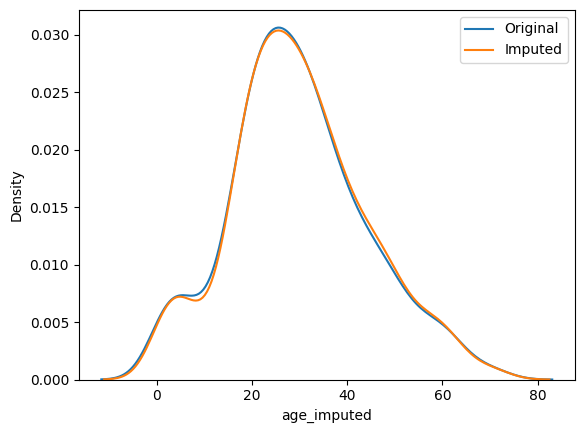

In [106]:
sns.distplot(x_train['Age'],label='Original', hist=False)
sns.distplot(x_train['age_imputed'],label='Imputed', hist=False)

plt.legend()
plt.show()

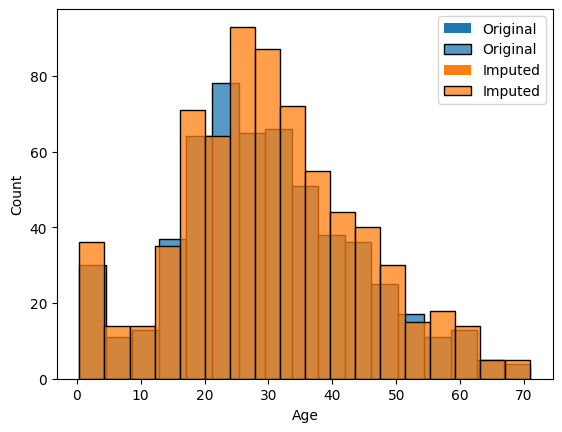

In [110]:
sns.histplot(x_train['Age'],label='Original')
sns.histplot(x_train['age_imputed'],label='Imputed')

plt.legend()
plt.show()

In [111]:
x_train.var()

Age             204.349513
Fare           2368.246832
age_imputed     203.110153
dtype: float64

In [112]:
x_train.cov()

,Age,Fare,age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,55.519313
age_imputed,204.349513,55.519313,203.110153


<AxesSubplot:>

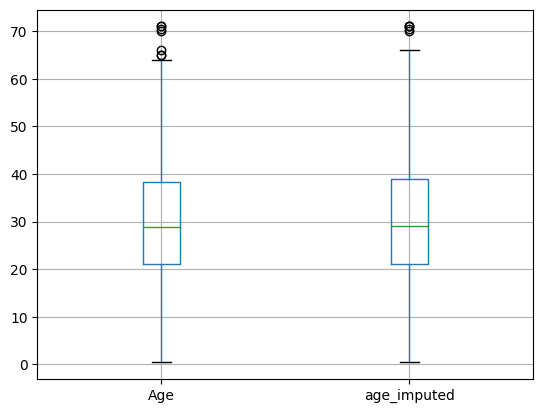

In [114]:
x_train[['Age','age_imputed']].boxplot()

In [123]:
sample_value = x_train.dropna().sample(1,random_state=int())